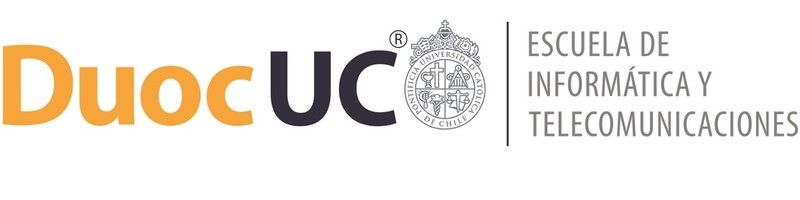

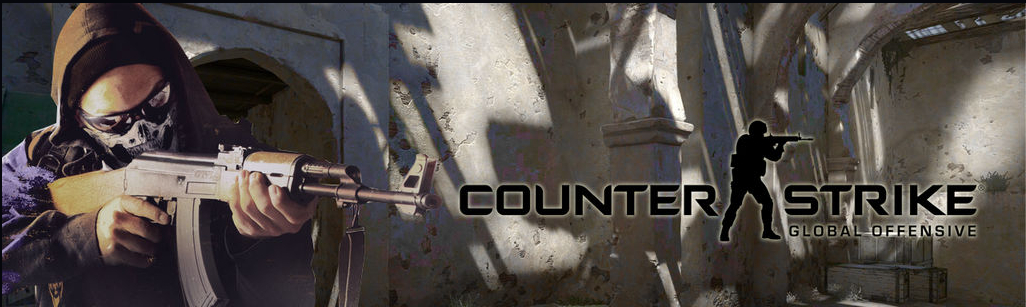

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Anthony Flores
* Tomás Yañez

Docente:     

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scraper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo unº error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

`Descripción de datos y contexto`
- Despues de analizar los datos del archivo .csv, el cual contiene 29 columnas que incluyen tanto datos categóricos(como nombre de mapa, el equipo y el
ganador de la ronda) como numéricos(como el tiempo de vida del equipo, número de granadas lanzadas, y métricas de rendimiento de armas). Este formato es adecuado para análisis de Machine Learning, ya que permite la manipulación y análisis de los datos de manera eficiente.
- Los datos obtenidos pueden ser utilizados para mejorar experiencia del jugador, optimizar estrategias de juego, y predecir resultados de partidas.

`Uso de machine Learning`
- Se pueden usar las tecnicas de regresion y clasificacion para predecir el resultado de una partida basandose en las metricas del rendimiento del equipo.
- Aplicar algoritmos de optimizacion para identificar las mejores estrategias de juego basadas en el analisis de datos historicos.

`Relevancia de datos`
- Datos del DataFrame son relevantes para tareas de regresion y clasificacion, como predecir el numero de muertes o asistencias basandose en metricas de rendimiento de equipo o clasificar partidas como "victorias" o "derrotas". Por otra parte para un analisis más integral, seria util tener datos adicionales como:
  - El historial de partidas: Para analizar tendencias a los largo del tiempo y predecir resultados futuros.
  - Estadisticas de rendimiento individual: Para identificar jugadores clave y su impacto en el rendimiento del equipo.
  - Feedback de los jugadores: Para entender la experiencia y mejorar la satisfacción.

`Objetivos`
- Fase de análisis:
 - Preparación de datos: limpiar y preparar los datos para el análisis, incluyendo la gestion de valores faltantes y la normalizacion de las métricas.
 - Exploracion de datos: Realizar un análisis exploratorio de datos para identificar patrones y tendencias en los datos.
 - Modelado: Aplicar técnicas de regresión y clasificación para predecir resultados de partidas y optimizar estrategias de juego.
- objetivos específicos:
  - Prediccion de resultados de partidas: Desarrollar modelos de regrésion y clasificación para predecir el resultado de una partida basandose en las métricas de rendimiento del equipo.
  

## Fase 2: Data Understanding

Importar librerias

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Crear DataFrame a partir de documento .csv, especificando delimitador de datos.



In [3]:
_s = os.path.sep
_DIR = __vsc_ipynb_file__.split(_s)[:-1]
_DIR = _s.join(_DIR)
os.chdir(_DIR)

In [4]:
df = pd.read_csv('caso_counter_strike.csv', delimiter=';')

/tmp/ipykernel_37729/365594165.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('caso_counter_strike.csv', delimiter=';')


Mostrar las primeras 5 filas de Dataframe, es una vista rapida de los datos.
Con esto nos hacemos una idea de los datos que hay en el dataset.

In [5]:
df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,...,0,0,0,0,750,4400,0,0,0,0
601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,...,0,0,0,0,800,4400,0,0,0,0
602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,...,0,0,0,0,1000,4400,0,0,0,0
603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,...,0,0,0,0,850,4400,0,0,0,0
604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,...,0,0,0,0,1000,4400,0,0,0,0


Visualizar informacion general del DataFrame.
Con esto nos hacemos una idea de los tipos de dato de las columnas, cantidad de filas y en general hacernos una idea de la forma del conjunto de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79157 entries, 600 to 123779
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79155 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  object 
 6   MatchWinner                  79156 non-null  object 
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   TimeAlive                    79157 non-null  object 
 10  TravelledDistance            79157 non-null  object 
 11  RLethalGrenadesThrown        79157 non-null  int64  
 12  RNonLethalGrenadesThrown     79157 non-null  int64  
 13  PrimaryAssaultRifl

Mostramos el resumen estadistico de los datos contenidos en el DataFrame.
  - count: El número de valores no nulos en cada columna.
  - mean: La media de los valores en cada columna.
  - std: La desviación estándar de los valores en cada columna, que mide la   - dispersión de los datos alrededor de la media.
  - min: El valor mínimo en cada columna.
  - 25%: El primer cuartil (Q1) de los datos, que es el valor por debajo del cual   - cae el 25% de los datos.
  - 50%: La mediana (Q2) de los datos, que es el valor medio cuando los datos están   - ordenados.
  - 75%: El tercer cuartil (Q3) de los datos, que es el valor por debajo del cual   - cae el 75% de los datos.
  - max: El valor máximo en cada columna.

Así nos podemos familiarizar con algunos de los datos muy útiles para estadística descriptiva.

In [7]:
df.describe()

,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,0.221787,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,0.415451,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


Lógica para mostrar una matriz de correlacion solo con las columnas númericas.

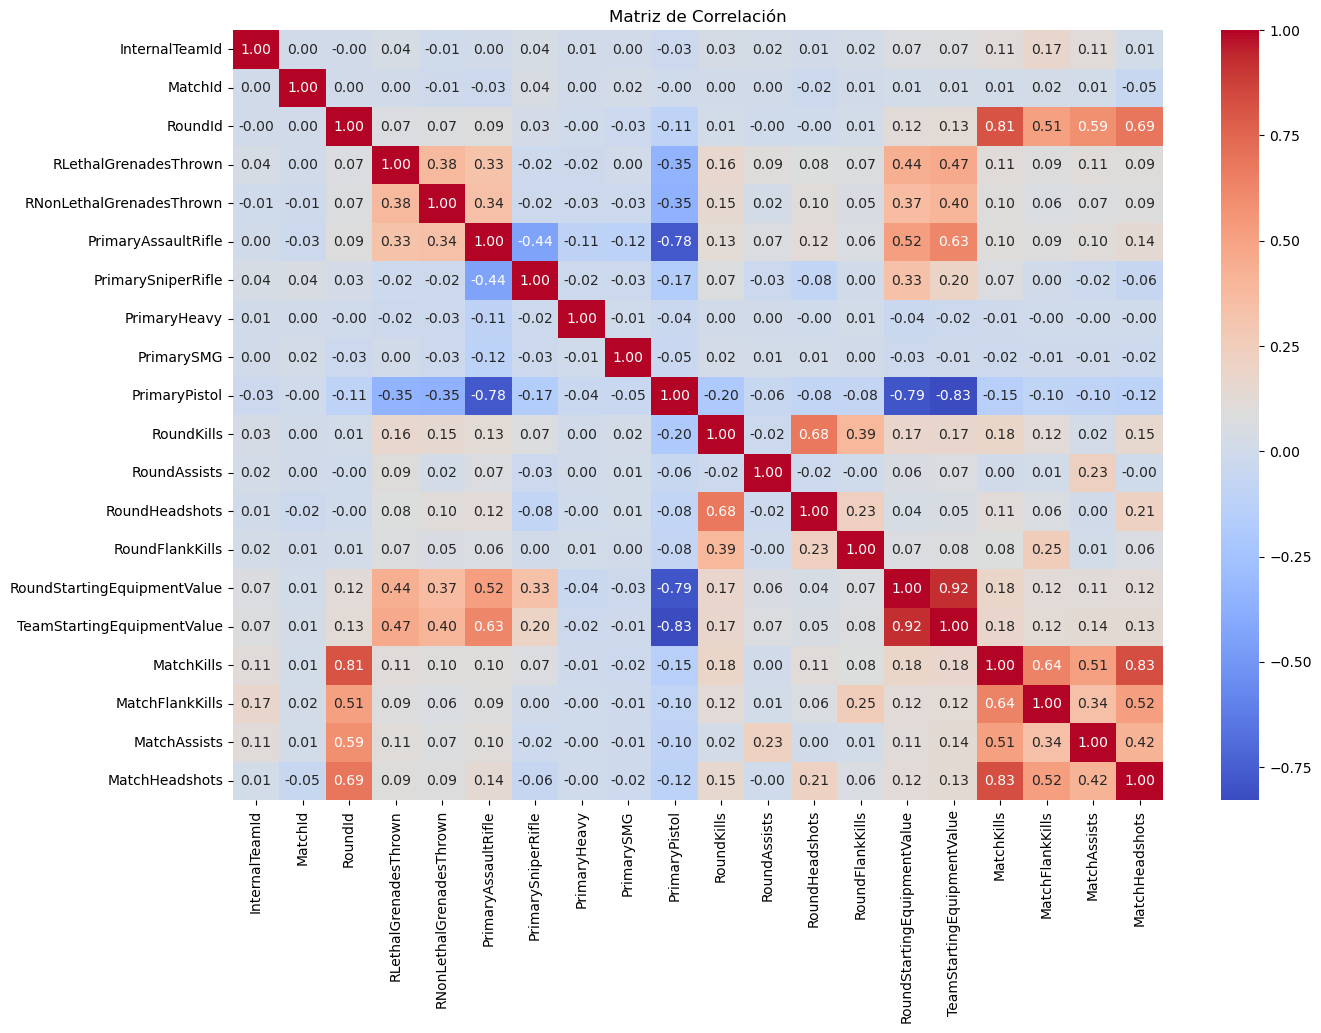

In [8]:
# Selecciona solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Calcula la correlación entre las columnas numéricas
correlation_columns = df[columnas_numericas].corr()

# Grafica la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_columns, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Se puede ver con esta matriz de correlación que hay ciertas columnas en este set de datos que llevan mayor correlación y por ende pueden revelar información muy útil al ser comparadas.
Como por ejemplo:
* RoundStartingEquipmentValue y PrimaryPistol
* RoundHeadshots y RoundKills
* MatchHeadshots y MatchKills

Visualización de la distribución de variables numéricas

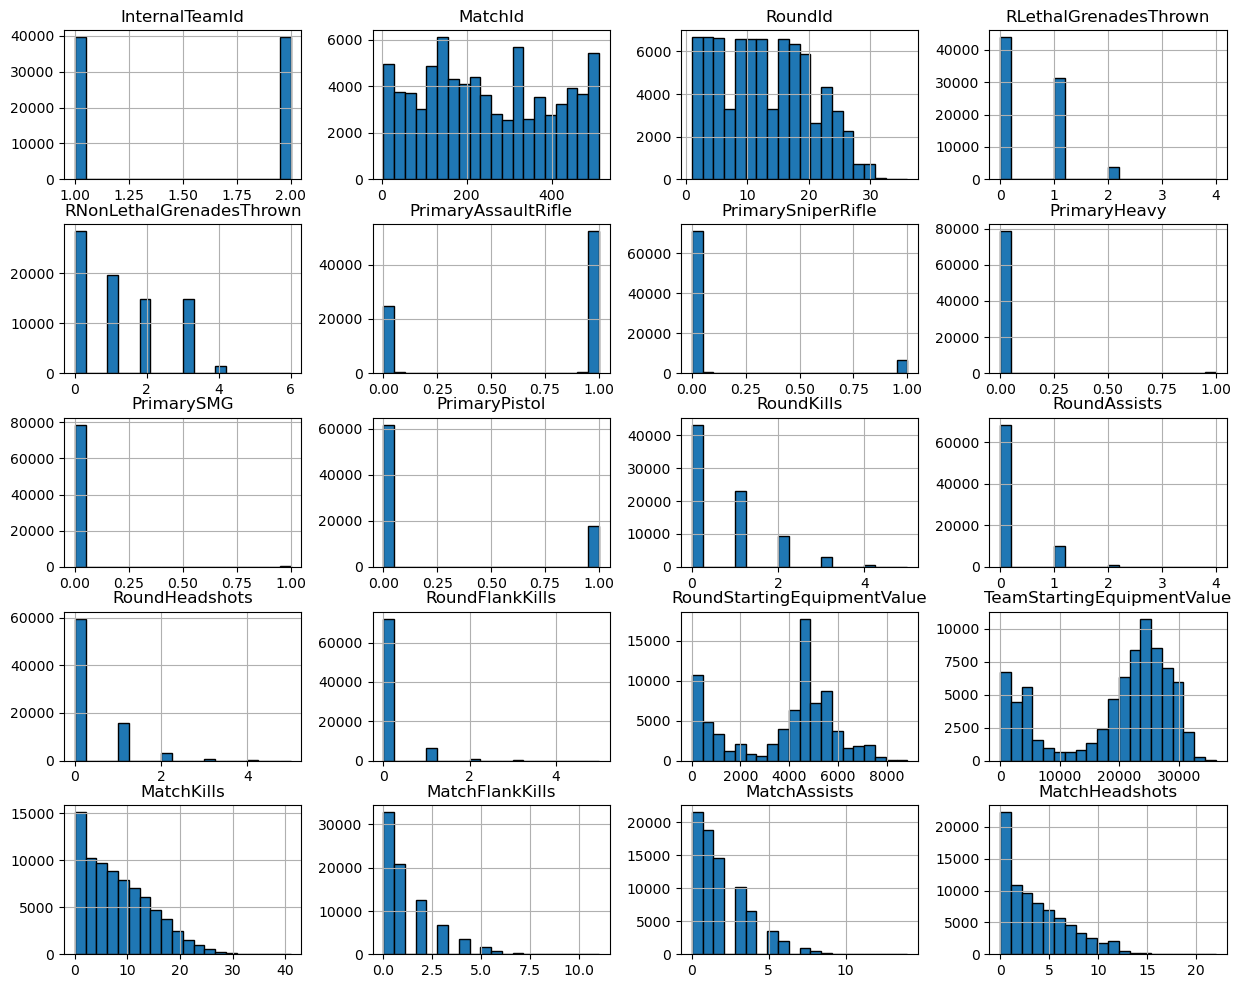

In [9]:
df.hist(figsize=(15, 12), bins=20, edgecolor="black")
# df['TimeAlive'].hist(bins=50)
plt.show()

Aquí se pueden observar la cantidad de veces que se presentan distintos valores por cada variable numérica.
Se puede observar como la gran mayoría de las granadas lanzadas no resultan en ninguna muerte, o que el rifle de asalto está presente en aproximadamente el doble de los jugadores y rondas en comparación con las que no está presente.

<br>


Correlacion entre número de muertes, valor del equipo usado en la ronda y numero de tiros en la cabeza

/tmp/ipykernel_37729/3128246284.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot( data = df, x = "RoundStartingEquipmentValue", y = "RoundKills", palette = "coolwarm")


<Axes: xlabel='RoundStartingEquipmentValue', ylabel='RoundKills'>

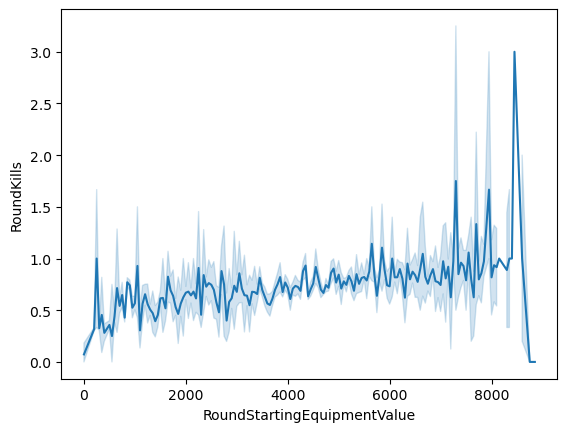

In [10]:

sns.lineplot( data = df, x = "RoundStartingEquipmentValue", y = "RoundKills", palette = "coolwarm")

Según este gráfico no se logra distinguir una correlación muy fuerte entre el número de eliminaciones y el valor del equipo inicial de la ronda a excepción de cuando el valor del equipo es superior a 8000. Esto parece indicar que la cantidad de eliminaciones es independiente del valor del equipo comprado durante la ronda, al contrario de lo que intuía el equipo de investigación.


Correlacion entre número de muertes y numero tiros en la cabeza.

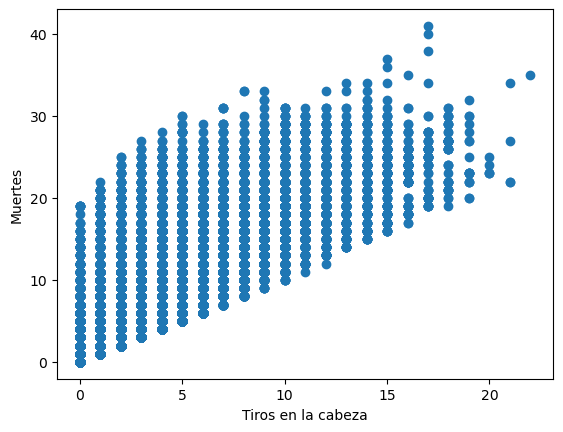

In [11]:
plt.scatter(df["MatchHeadshots"], df["MatchKills"])
plt.xlabel("Tiros en la cabeza")
plt.ylabel("Muertes")
plt.show()

Se aprecia una una correlación positiva entre los tiros en la cabeza y las muertes. Esto sugiere que a medida que un jugador realiza más tiros en la cabeza, tiende a eliminar más jugadores en la partida.

In [12]:
# Selecciona solo las columnas letras
columnas_letras = df.select_dtypes(include=['object']).columns
columnas_letras
# df["Team"].value_counts()

Index(['Map', 'Team', 'RoundWinner', 'MatchWinner', 'TimeAlive',
       'TravelledDistance', 'FirstKillTime'],
      dtype='object')

Correlacion entre PrimaryAssaultRifle y otras variables

In [13]:
# Seleccionar solo las columnas numéricas del DataFrame original
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcula la correlación entre las columnas numéricas y "MatchKills"
correlation = columnas_numericas.corr()["PrimaryAssaultRifle"]

# Ordena los valores de correlación de forma descendente
correlation_sorted = correlation.sort_values(ascending=False)

correlation_sorted

PrimaryAssaultRifle            1.000000
TeamStartingEquipmentValue     0.627534
RoundStartingEquipmentValue    0.518780
RNonLethalGrenadesThrown       0.339062
RLethalGrenadesThrown          0.326426
MatchHeadshots                 0.142642
RoundKills                     0.127903
RoundHeadshots                 0.119863
MatchAssists                   0.103451
MatchKills                     0.095224
MatchFlankKills                0.087460
RoundId                        0.085892
RoundAssists                   0.065941
RoundFlankKills                0.063766
InternalTeamId                 0.001750
MatchId                       -0.027313
PrimaryHeavy                  -0.108901
PrimarySMG                    -0.119824
PrimarySniperRifle            -0.440642
PrimaryPistol                 -0.776826
Name: PrimaryAssaultRifle, dtype: float64

Se puede ver con los datos anteriores que hay una gran correlación entre el valor del equipo inicial del equipo y el uso de rifles de asalto.
Esto puede deberse a que el equipo más caro tiende a ser un activo cuando el jugador forma parte  de un tiroteo, facilita la eliminación de oponentes y obtención de dinero suficiente para comprar rifles de asalto.

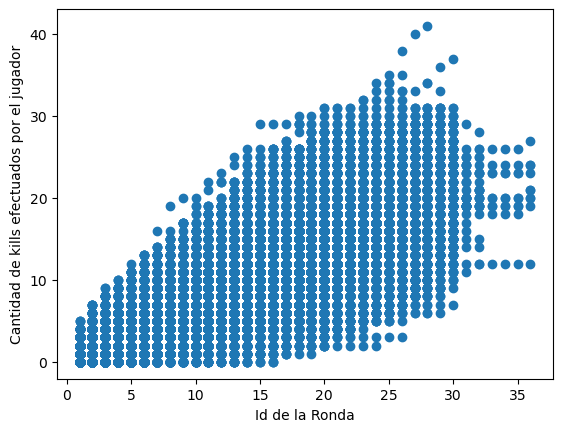

In [14]:
plt.scatter(df["RoundId"], df["MatchKills"])
plt.xlabel("Id de la Ronda")
plt.ylabel("Cantidad de kills efectuados por el jugador")
plt.show()

Aquí se puede observar lo que se espera, una cantidad mayor de eliminaciones, acumuladas establemente durante la partida a lo largo de cada ronda.
Esto nos muestra que es muy poco probable que conforme avancen las rondas los jugadores sean cada vez más o menos propensos a intentar cumplir el objetivo evitando conflictos directos.

In [15]:
df.AbnormalMatch.head()

600    False
601    False
602    False
603    False
604    False
Name: AbnormalMatch, dtype: bool

<Axes: xlabel='RoundWins', ylabel='MatchWins'>

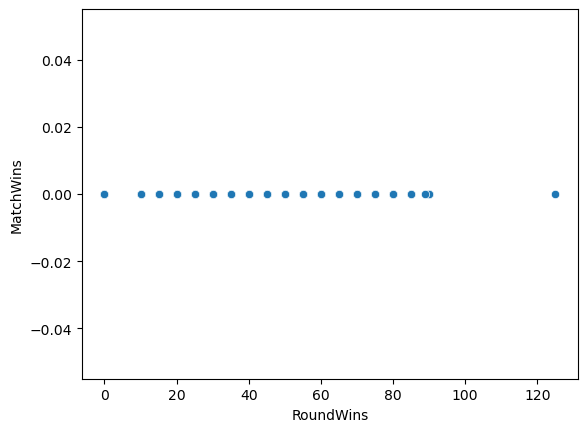

In [16]:
import functools as ft
df_selected = df.groupby(['MatchId', 'InternalTeamId']).agg({
    'AbnormalMatch': any,
    'MatchWinner': lambda x: sum(x.map(lambda y: int(y == "True"))),
    "RoundWinner": lambda x: sum(x.map(lambda y: int(y == "True")))
}).sort_values(by=['MatchId', 'InternalTeamId'], ascending=True).reset_index()
df_selected.columns = ['MatchId', 'InternalTeamId', 'AbnormalMatch', 'MatchWins', 'RoundWins']

# am = amdf[["AbnormalMatch"]].map(lambda x: int(x))
# sv = pd.DataFrame(df.groupby(["MatchId", "InternalTeamId"])).Survived.sum()

sns.scatterplot(df_selected, x="RoundWins", y="MatchWins")

## Fase 3: Data Preparation

Mostramos el número total de valores nulos en las columnas, para encontrar el numero total de valores nulos.

In [17]:
df.isna().sum()

Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

Rellenamos los valores nulos por las (NaN) para representar que son datos nulos y volvemos a consultar si aun existen valores nulos

In [18]:
df['Team'] = df['Team'].fillna('NaN')
df['MatchWinner'] = df['MatchWinner'].fillna('NaN')
df.isna().sum()

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

Preparamos los campos "Team" y "Map" con One Hot Encoding para volverlos utilizables para un modelo.

In [19]:
team_dummies = pd.get_dummies(df["Team"], dtype = int )
map_dummies = pd.get_dummies(df["Map"], dtype = int)
df_drop = df.join(team_dummies)
df_drop = df.join(map_dummies)
df_drop = df.drop(["Team", "Map"], axis = 1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79157 entries, 600 to 123779
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   InternalTeamId               79157 non-null  int64  
 1   MatchId                      79157 non-null  int64  
 2   RoundId                      79157 non-null  int64  
 3   RoundWinner                  79157 non-null  object 
 4   MatchWinner                  79157 non-null  object 
 5   Survived                     79157 non-null  bool   
 6   AbnormalMatch                79157 non-null  bool   
 7   TimeAlive                    79157 non-null  object 
 8   TravelledDistance            79157 non-null  object 
 9   RLethalGrenadesThrown        79157 non-null  int64  
 10  RNonLethalGrenadesThrown     79157 non-null  int64  
 11  PrimaryAssaultRifle          79157 non-null  float64
 12  PrimarySniperRifle           79157 non-null  float64
 13  PrimaryHeavy      

Reemplazamos los valores de texto de las columnas RoundWinner y MatchWinner referentes a valores booleanos, por valores booleanos reales.

In [20]:
# Convertir "True" y "False" a valores booleanos en las columnas "RoundWinner" y "MatchWinner"
df["RoundWinner"] = df["RoundWinner"].replace({"True": True, "False": False})
df["MatchWinner"] = df["MatchWinner"].replace({"True": True, "False": False})

# Verificar información de las columnas
df[["RoundWinner", "MatchWinner"]].head().reset_index()

,index,RoundWinner,MatchWinner
0,600,False,True
1,601,False,True
2,602,False,True
3,603,False,True
4,604,False,True


## Fase 4: Modeling

### Regresión

In [21]:
# Insertar cuantos bloques de código consideren necesarios
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
df["RoundWinner"] = df.RoundWinner.map(lambda x: x if type(x) is bool else "True" in x if type(x) is str else x > 0 if type(x) is float else bool(x))
df["RoundKills"] = df.RoundKills.map(lambda x: x if type(x) in (int, float) else int(x))
dataX =df[["RoundWinner"]]
X_train = np.array(dataX)
y_train = df['RoundKills'].values

# Realizar tarea de regresión de datos orientado al caso entregado
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.47480079]
Independent term: 
 0.908686756422239
Mean squared error: 0.72
Variance score: 0.07


### Clasificación



In [22]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de clasificación de datos orientado al caso entregado

## Fase 5: Evaluation

In [23]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

## Fase 5: Deployment

In [24]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo